# Architecture

## Main Part

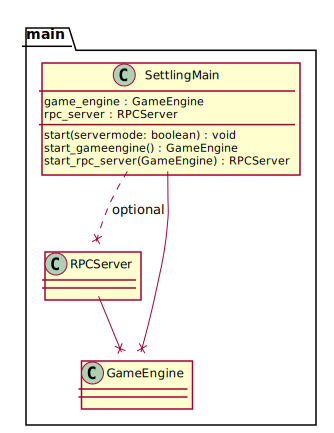

In [1]:
%%plantuml

@startuml
package "main" {
    class SettlingMain
    {
        game_engine : GameEngine
        rpc_server : RPCServer
        start(servermode: boolean) : void
        start_gameengine() : GameEngine
        start_rpc_server(GameEngine) : RPCServer
    }
    class RPCServer
    class GameEngine
}

SettlingMain ..x RPCServer : optional
SettlingMain --x GameEngine
RPCServer --x GameEngine

@enduml

# Game Engine

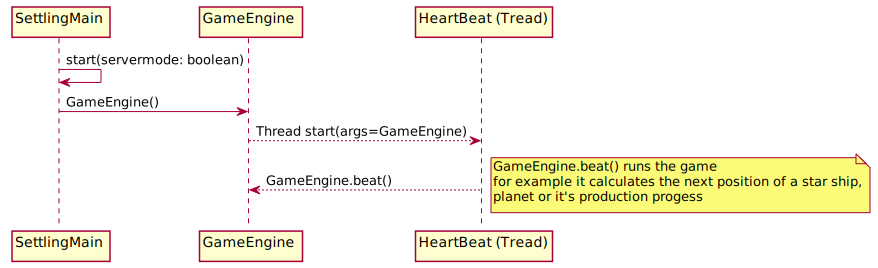

In [2]:
%%plantuml

@startuml
SettlingMain -> SettlingMain : start(servermode: boolean)
SettlingMain -> GameEngine : GameEngine()
GameEngine --> "HeartBeat (Tread)" as HeartBeat : Thread start(args=GameEngine)
HeartBeat --> GameEngine : GameEngine.beat()
note right
GameEngine.beat() runs the game
for example it calculates the next position of a star ship,
planet or it's production progess
end note
@enduml

### Gui

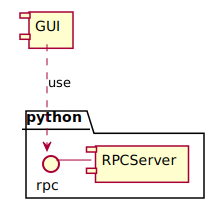

In [2]:
%%plantuml

@startuml
component GUI

package "python" {
    rpc - [RPCServer]
}

GUI ..> rpc : use

@enduml

or

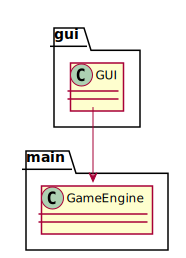

In [3]:
%%plantuml

@startuml

package "gui" {
    class GUI
}

package "main" {
    class GameEngine
}

GUI --> GameEngine

@enduml

## Generic components

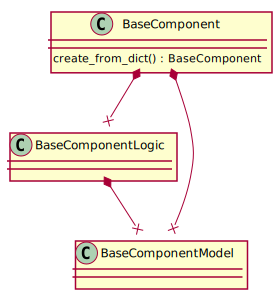

In [4]:
%%plantuml

@startuml
class BaseComponent{
    {static} create_from_dict() : BaseComponent
}
class BaseComponentLogic
class BaseComponentModel

BaseComponent *--x BaseComponentLogic
BaseComponent *--x BaseComponentModel
BaseComponentLogic *--x BaseComponentModel


@enduml